# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
weather_api_key


'98ccb54ddc72f5b67ab3289b007a1fb3'

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
     # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    #Get weather data
    weather_response = requests.get(city_url)
    
    #print(f"Request URL for {city}: {weather_response.url}")
    
     # Run an API request for each of the cities
        # Parse the JSON and retrieve data
    try:
        
        # Parse the JSON and retrieve data
        city_weather = weather_response.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date 
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
            
    
     # Append the City information into city_data list
        city_data.append({
                "City": city,
                "Latitude": city_lat,
                "Longitude": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
                          })

    except:
        print("City not found. Skipping...")
        pass              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saldanha
Processing Record 2 of Set 1 | odienne
Processing Record 3 of Set 1 | kailua-kona
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | isafjordur
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | nar'yan-mar
Processing Record 8 of Set 1 | udachny
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | saipan
Processing Record 11 of Set 1 | port lincoln
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | oranjemund
Processing Record 14 of Set 1 | fort bragg
Processing Record 15 of Set 1 | atherton
Processing Record 16 of Set 1 | mount pearl
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | cururupu
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | east ballina
Processing Record 22 of Set 1 | lebu
Processing Record 23 of Set 

Processing Record 38 of Set 4 | moradabad
Processing Record 39 of Set 4 | bereznik
Processing Record 40 of Set 4 | labrador city
Processing Record 41 of Set 4 | lahan
Processing Record 42 of Set 4 | mar del plata
Processing Record 43 of Set 4 | zilair
Processing Record 44 of Set 4 | kisesa
Processing Record 45 of Set 4 | aasiaat
Processing Record 46 of Set 4 | epernon
Processing Record 47 of Set 4 | mili
Processing Record 48 of Set 4 | dudinka
Processing Record 49 of Set 4 | magole
Processing Record 0 of Set 5 | shingu
Processing Record 1 of Set 5 | nishinoomote
Processing Record 2 of Set 5 | hirara
Processing Record 3 of Set 5 | vilyuchinsk
Processing Record 4 of Set 5 | trenton
Processing Record 5 of Set 5 | tondano
Processing Record 6 of Set 5 | aswan
Processing Record 7 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 8 of Set 5 | yssingeaux
Processing Record 9 of Set 5 | barra de santo antonio
Processing Record 10 of Set 5 | nikshahr
City not found. Skipping...


Processing Record 31 of Set 8 | sao miguel do araguaia
Processing Record 32 of Set 8 | amahai
Processing Record 33 of Set 8 | yeed
Processing Record 34 of Set 8 | walvis bay
Processing Record 35 of Set 8 | manismata
Processing Record 36 of Set 8 | holualoa
Processing Record 37 of Set 8 | arteche
Processing Record 38 of Set 8 | beacon square
Processing Record 39 of Set 8 | mugia
Processing Record 40 of Set 8 | hayma'
City not found. Skipping...
Processing Record 41 of Set 8 | port glaud
City not found. Skipping...
Processing Record 42 of Set 8 | mount gambier
Processing Record 43 of Set 8 | viedma
Processing Record 44 of Set 8 | wenchang
Processing Record 45 of Set 8 | guapiacu
Processing Record 46 of Set 8 | saudarkrokur
Processing Record 47 of Set 8 | fortuna
Processing Record 48 of Set 8 | vilyuysk
Processing Record 49 of Set 8 | aljezur
Processing Record 0 of Set 9 | itoman
Processing Record 1 of Set 9 | al ghayzah
Processing Record 2 of Set 9 | acapulco de juarez
Processing Record 

Processing Record 21 of Set 12 | nhlangano
Processing Record 22 of Set 12 | uturoa
Processing Record 23 of Set 12 | urangan
Processing Record 24 of Set 12 | mancio lima
Processing Record 25 of Set 12 | aliabad
Processing Record 26 of Set 12 | banyo
Processing Record 27 of Set 12 | carnarvon
Processing Record 28 of Set 12 | ancud
Processing Record 29 of Set 12 | metlili chaamba
Processing Record 30 of Set 12 | mana
Processing Record 31 of Set 12 | hinton
Processing Record 32 of Set 12 | pont rouge
Processing Record 33 of Set 12 | bratsk
Processing Record 34 of Set 12 | kertih
Processing Record 35 of Set 12 | anatuya
Processing Record 36 of Set 12 | governor's harbour
City not found. Skipping...
Processing Record 37 of Set 12 | irymple
Processing Record 38 of Set 12 | ourinhos
Processing Record 39 of Set 12 | pacific grove
Processing Record 40 of Set 12 | nouadhibou
Processing Record 41 of Set 12 | santa rosa
Processing Record 42 of Set 12 | kabalo
Processing Record 43 of Set 12 | tromso

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Latitude      590
Longitude     590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saldanha,-33.0117,17.9442,14.03,93,15,1.85,ZA,1691799792
1,odienne,9.5100,-7.5692,22.09,97,100,1.32,CI,1691799792
2,kailua-kona,19.6406,-155.9956,29.72,78,40,6.69,US,1691799792
3,hermanus,-34.4187,19.2345,12.67,93,6,1.91,ZA,1691799792
4,isafjordur,66.0755,-23.1240,8.88,87,91,2.69,IS,1691799792


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saldanha,-33.0117,17.9442,14.03,93,15,1.85,ZA,1691799792
1,odienne,9.5100,-7.5692,22.09,97,100,1.32,CI,1691799792
2,kailua-kona,19.6406,-155.9956,29.72,78,40,6.69,US,1691799792
3,hermanus,-34.4187,19.2345,12.67,93,6,1.91,ZA,1691799792
4,isafjordur,66.0755,-23.1240,8.88,87,91,2.69,IS,1691799792


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

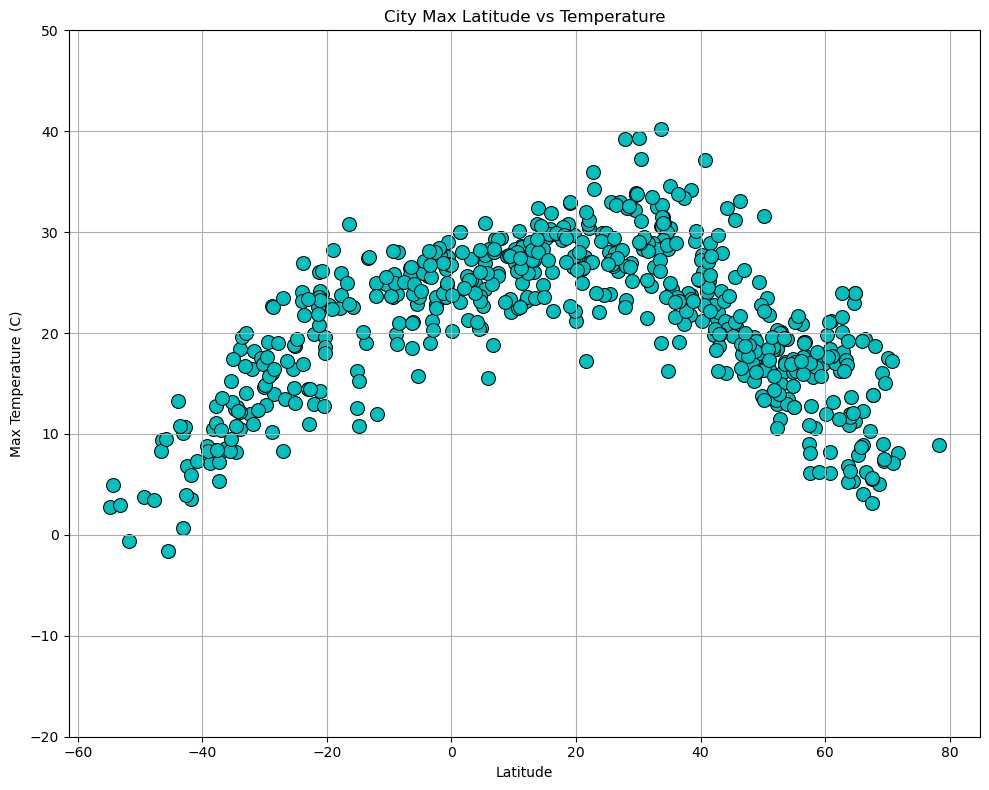

In [11]:
# Build scatter plot for latitude vs. temperature
Lat_Temp_df = city_data_df.drop(['City','Longitude','Cloudiness','Wind Speed','Country','Date','Humidity'], axis=1)
plt.figure(figsize=(10,8))
plt.scatter(city_data_df['Latitude'],city_data_df['Max Temp'], color='c', s=100, edgecolors='black', linewidths=.75)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs Temperature')
plt.grid()
plt.ylim(-20,50)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

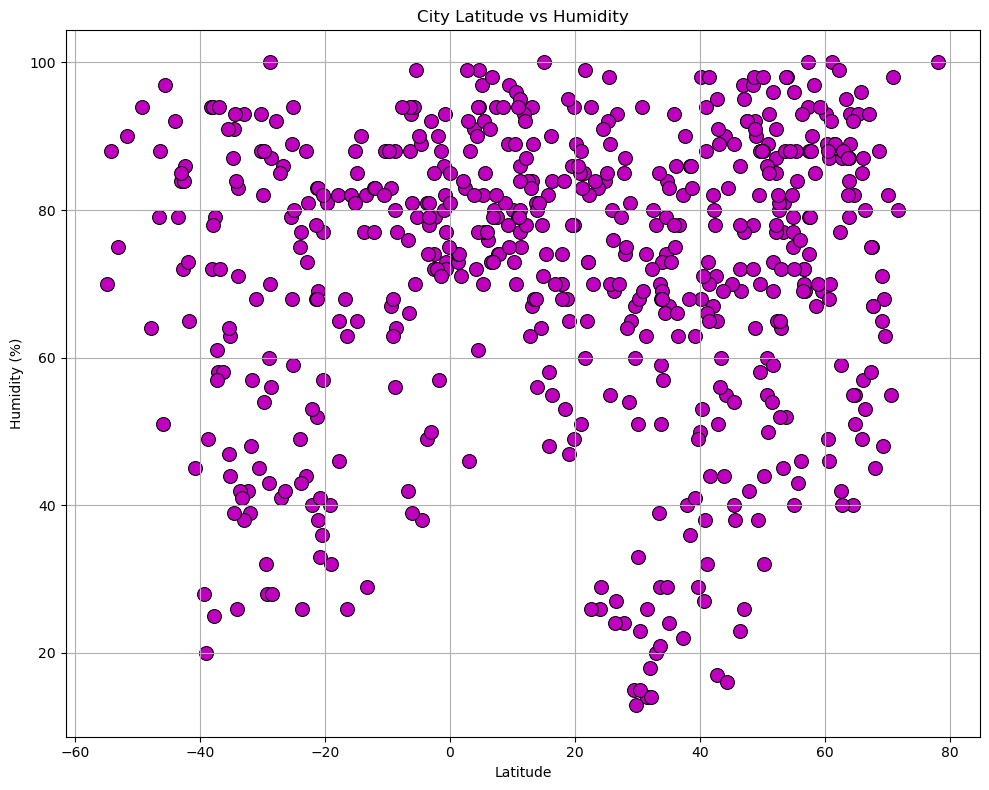

In [13]:
# Build the scatter plots for latitude vs. humidity
Lat_Hum_df = city_data_df.drop(['City','Longitude','Cloudiness','Wind Speed','Country','Date','Max Temp'], axis=1)
#Lat_Temp_df.head()
plt.figure(figsize=(10,8))
plt.scatter(city_data_df['Latitude'],city_data_df['Humidity'], color='m', s=100, edgecolors='black', linewidths=.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity')
plt.grid()
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

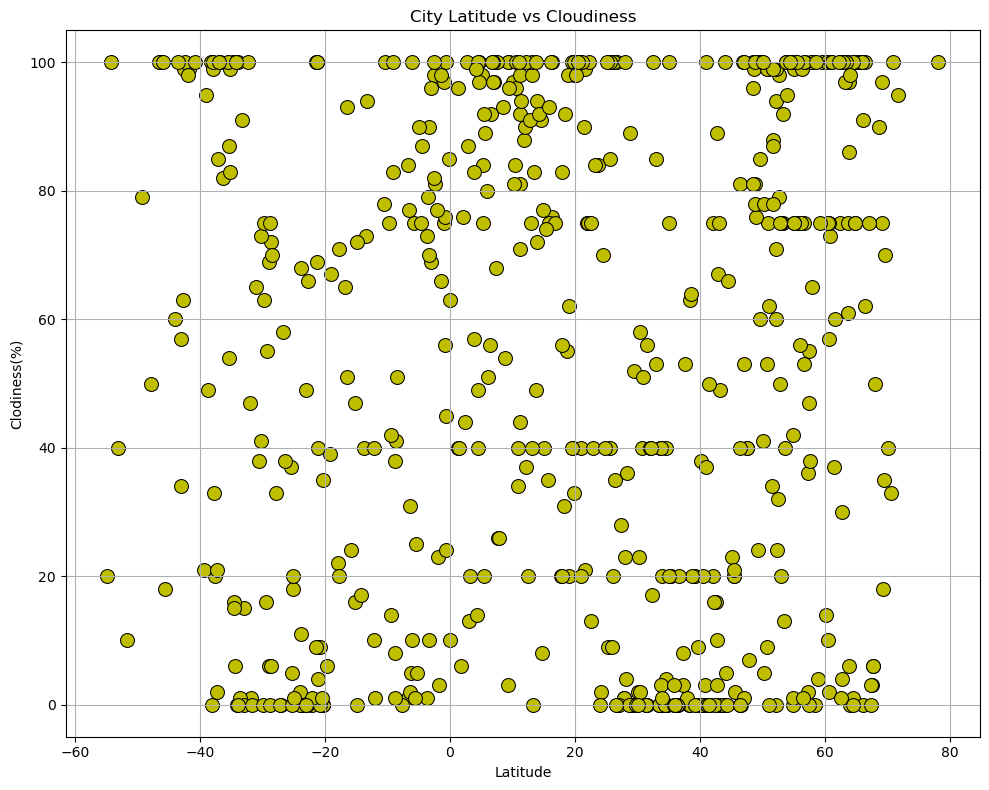

In [14]:
# Build the scatter plots for latitude vs. cloudiness
Lat_Cloud_df = city_data_df.drop(['City','Longitude','Humidity','Wind Speed','Country','Date','Max Temp'],axis=1)
#Lat_Cloud_df.head()
plt.figure(figsize=(10,8))
plt.scatter(Lat_Cloud_df['Latitude'],Lat_Cloud_df['Cloudiness'], color = 'y', s=100, edgecolors='black', linewidths=.75)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Clodiness(%)')
plt.title('City Latitude vs Cloudiness')
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

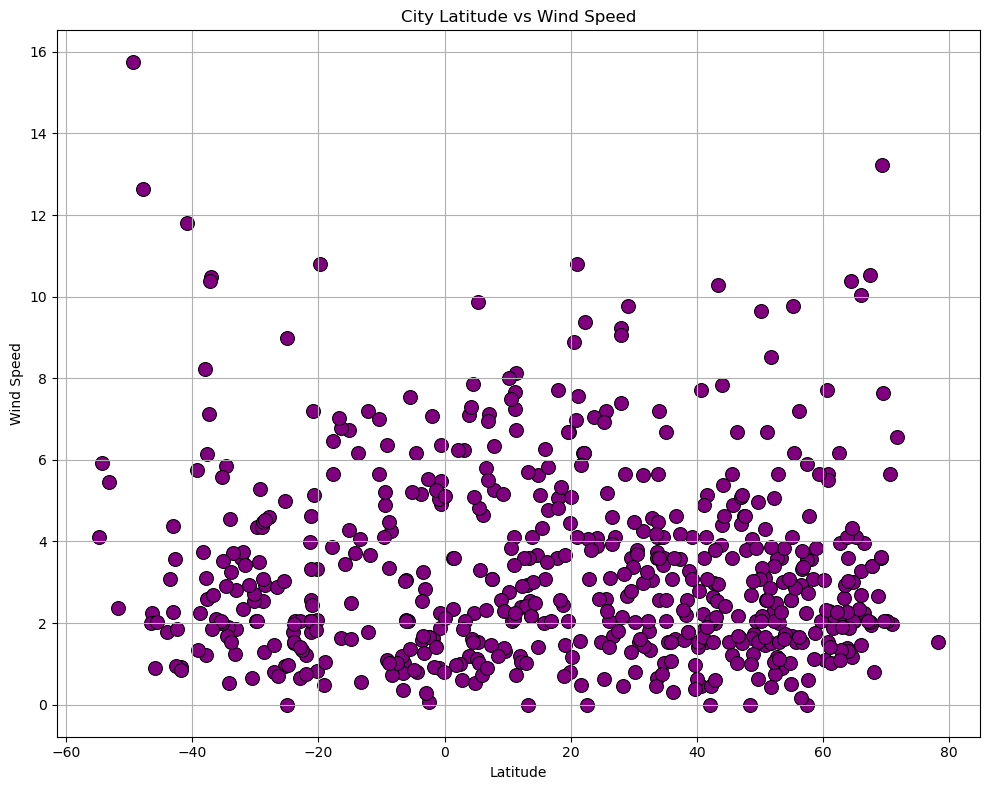

In [15]:
# Build the scatter plots for latitude vs. wind speed
Lat_Wind_df = city_data_df.drop(['City','Longitude','Humidity','Cloudiness','Country','Date','Max Temp'],axis=1)
#Lat_Wind_df.head()
plt.figure(figsize=(10,8))
plt.scatter(Lat_Wind_df['Latitude'],Lat_Wind_df['Wind Speed'], color = 'purple', s = 100, edgecolors='black', linewidths=.75)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed')
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots


In [16]:
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saldanha,-33.0117,17.9442,14.03,93,15,1.85,ZA,1691799792
1,odienne,9.5100,-7.5692,22.09,97,100,1.32,CI,1691799792
2,kailua-kona,19.6406,-155.9956,29.72,78,40,6.69,US,1691799792
3,hermanus,-34.4187,19.2345,12.67,93,6,1.91,ZA,1691799792
4,isafjordur,66.0755,-23.1240,8.88,87,91,2.69,IS,1691799792


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Latitude']>=0]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,odienne,9.5100,-7.5692,22.09,97,100,1.32,CI,1691799792
2,kailua-kona,19.6406,-155.9956,29.72,78,40,6.69,US,1691799792
4,isafjordur,66.0755,-23.1240,8.88,87,91,2.69,IS,1691799792
6,nar'yan-mar,67.6713,53.0870,13.90,67,6,3.39,RU,1691799792
7,udachny,66.4167,112.4000,19.40,53,100,3.95,RU,1691799793


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Latitude']<=0]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saldanha,-33.0117,17.9442,14.03,93,15,1.85,ZA,1691799792
3,hermanus,-34.4187,19.2345,12.67,93,6,1.91,ZA,1691799792
5,grytviken,-54.2811,-36.5092,4.93,88,100,5.92,GS,1691799792
10,port lincoln,-34.7333,135.8667,12.50,87,100,5.85,AU,1691799793
12,oranjemund,-28.5500,16.4333,13.95,87,72,2.94,NaN,1691799794


###  Temperature vs. Latitude Linear Regression Plot

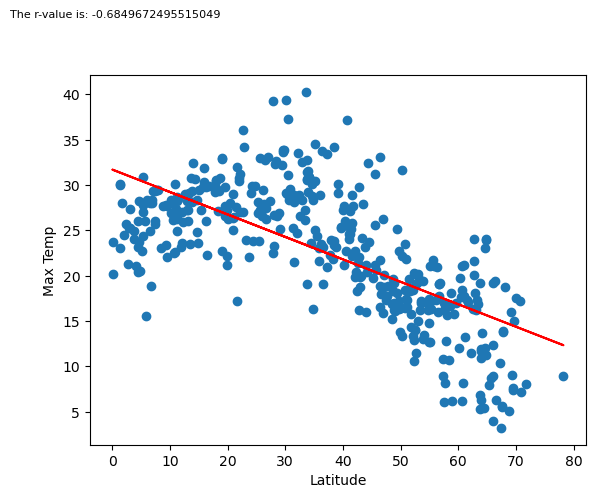

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Latitude']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
r_val_str = f"The r-value is: {rvalue}"
plt.gcf().text(0, 1, r_val_str, fontsize=8)
plt.show()




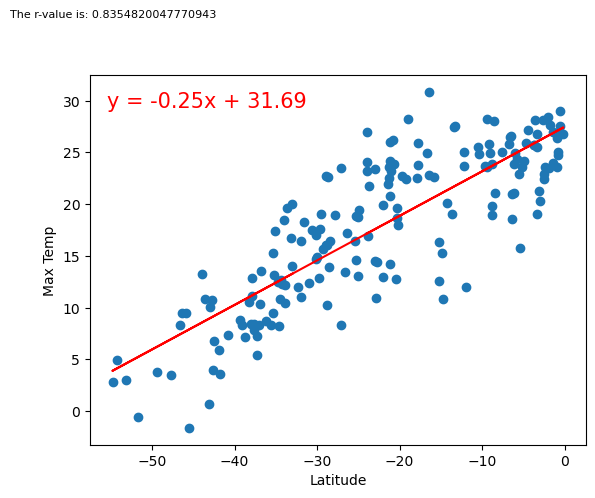

In [20]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Latitude']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.figure()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(0, 1), xytext=(12, -12), va='top',
             xycoords='axes fraction', textcoords='offset points',fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
r_val_str = f"The r-value is: {rvalue}"
plt.gcf().text(0, 1, r_val_str, fontsize=8)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

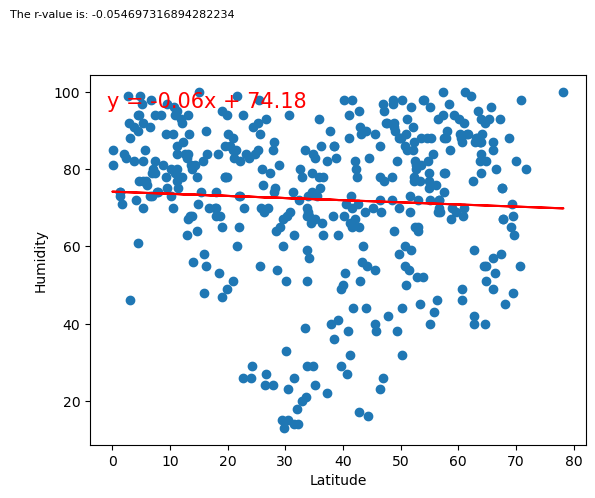

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Latitude']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(0, 1), xytext=(12, -12), va='top',
             xycoords='axes fraction', textcoords='offset points',fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
r_val_str = f"The r-value is: {rvalue}"
plt.gcf().text(0, 1, r_val_str, fontsize=8)
plt.show()

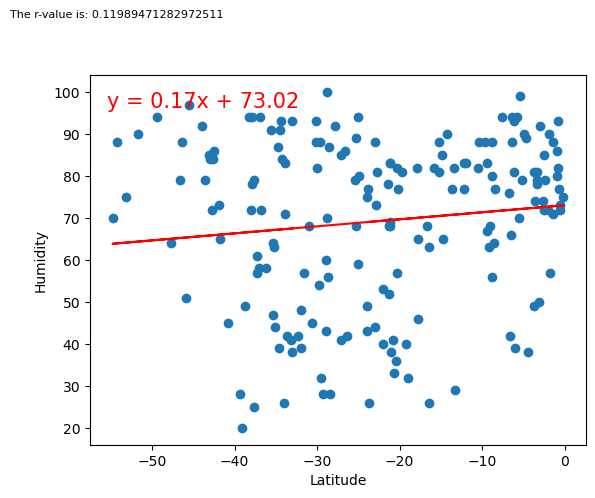

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Latitude']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(0, 1), xytext=(12, -12), va='top',
             xycoords='axes fraction', textcoords='offset points',fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
r_val_str = f"The r-value is: {rvalue}"
plt.gcf().text(0, 1, r_val_str, fontsize=8)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

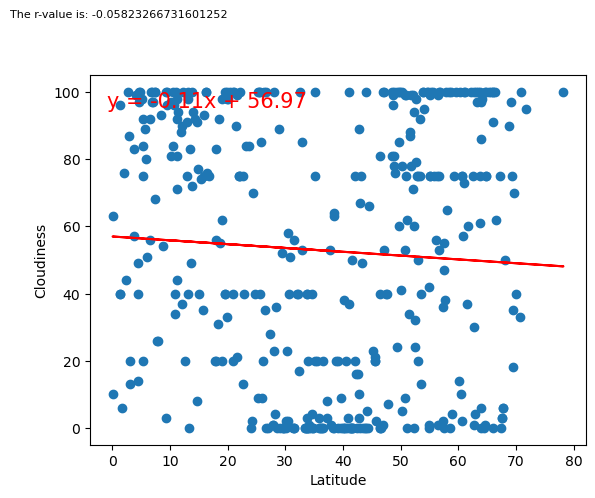

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Latitude']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(0, 1), xytext=(12, -12), va='top',
             xycoords='axes fraction', textcoords='offset points',fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
r_val_str = f"The r-value is: {rvalue}"
plt.gcf().text(0, 1, r_val_str, fontsize=8)
plt.show()


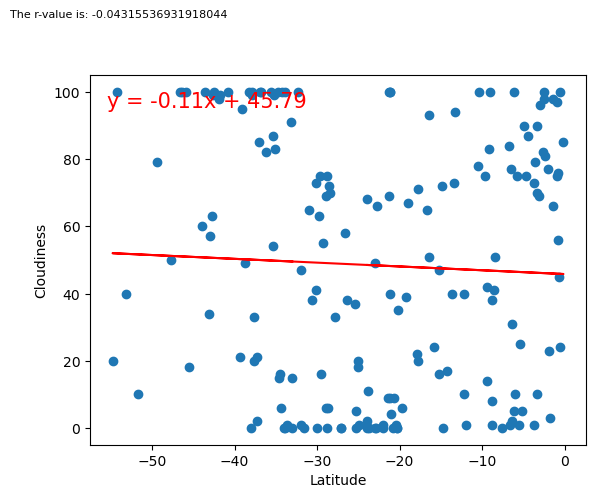

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Latitude']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(0, 1), xytext=(12, -12), va='top',
             xycoords='axes fraction', textcoords='offset points',fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
r_val_str = f"The r-value is: {rvalue}"
plt.gcf().text(0, 1, r_val_str, fontsize=8)
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

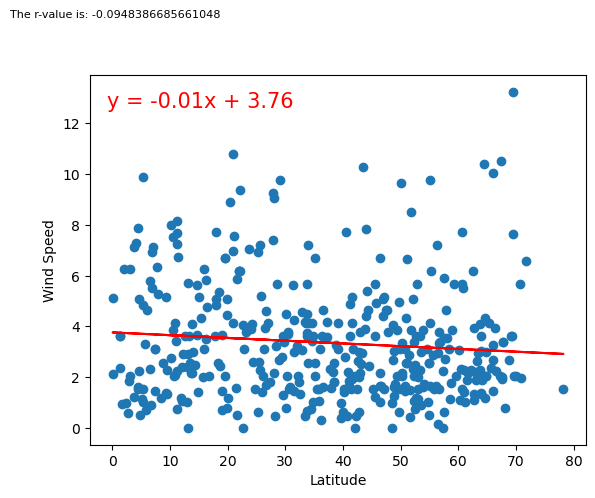

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df['Latitude']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(0, 1), xytext=(12, -12), va='top',
             xycoords='axes fraction', textcoords='offset points',fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
r_val_str = f"The r-value is: {rvalue}"
plt.gcf().text(0, 1, r_val_str, fontsize=8)
plt.show()

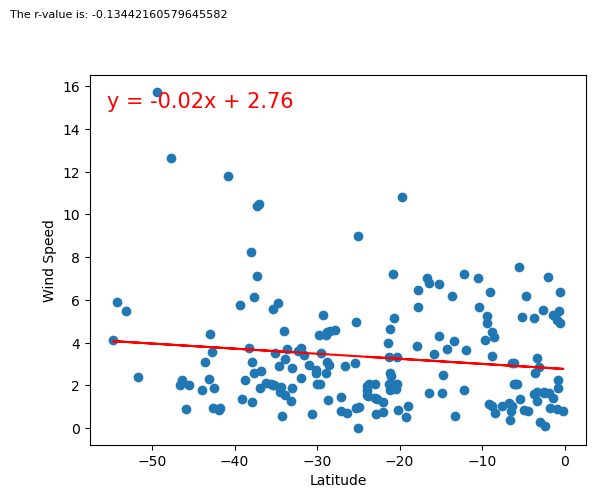

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df['Latitude']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(0, 1), xytext=(12, -12), va='top',
             xycoords='axes fraction', textcoords='offset points',fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
r_val_str = f"The r-value is: {rvalue}"
plt.gcf().text(0, 1, r_val_str, fontsize=8)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE